In [1]:
#default_exp core

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
#export
from fastai2.torch_basics import *
# from fastai2.test import *
from fastai2.data.all import *

In [4]:
from nbdev.showdoc import *

In [5]:
from fastai2.layers import *
from fastai2.learner import *
from fastai2.metrics import *
from fastai2.callback.schedule import *
from fastai2.callback.hook import *
from fastai2.callback.progress import *
from fastai2.callback.mixup import *
from fastai2.optimizer import *

In [6]:
from timeseries.tsdata import *
from timeseries.models.inception_time import *

In [7]:
path_data = Config().data
path_data, path_data.ls()

(Path('C:/Users/fh/.fastai/data'),
 (#23) [Path('C:/Users/fh/.fastai/data/adult_sample'),Path('C:/Users/fh/.fastai/data/adult_sample.tgz'),Path('C:/Users/fh/.fastai/data/biwi_sample'),Path('C:/Users/fh/.fastai/data/bluebook-for-bulldozers.zip'),Path('C:/Users/fh/.fastai/data/bulldozers'),Path('C:/Users/fh/.fastai/data/camvid'),Path('C:/Users/fh/.fastai/data/camvid.tgz'),Path('C:/Users/fh/.fastai/data/camvid_tiny'),Path('C:/Users/fh/.fastai/data/coco_tiny'),Path('C:/Users/fh/.fastai/data/imagenette-160')...])

In [8]:
#dsid =  'NATOPS' #'NATOPS''LSST'
dsname =  'NATOPS' #'NATOPS', 'LSST', 'Wine', 'Epilepsy', 'HandMovementDirection'


In [9]:
path = download_unzip_data_UCR(dsname=dsname)
path.ls()

(#54) [Path('C:/Users/fh/.fastai/data/NATOPS/NATOPS.jpg'),Path('C:/Users/fh/.fastai/data/NATOPS/NATOPS.txt'),Path('C:/Users/fh/.fastai/data/NATOPS/NATOPSDimension10_TEST.arff'),Path('C:/Users/fh/.fastai/data/NATOPS/NATOPSDimension10_TRAIN.arff'),Path('C:/Users/fh/.fastai/data/NATOPS/NATOPSDimension11_TEST.arff'),Path('C:/Users/fh/.fastai/data/NATOPS/NATOPSDimension11_TRAIN.arff'),Path('C:/Users/fh/.fastai/data/NATOPS/NATOPSDimension12_TEST.arff'),Path('C:/Users/fh/.fastai/data/NATOPS/NATOPSDimension12_TRAIN.arff'),Path('C:/Users/fh/.fastai/data/NATOPS/NATOPSDimension13_TEST.arff'),Path('C:/Users/fh/.fastai/data/NATOPS/NATOPSDimension13_TRAIN.arff')...]

In [10]:
fname_train = path_data/f'{dsname}/{dsname}_Train.arff'
fname_test = path_data/f'{dsname}/{dsname}_Test.arff'
fnames = [fname_train, fname_test]
fnames

[Path('C:/Users/fh/.fastai/data/NATOPS/NATOPS_Train.arff'),
 Path('C:/Users/fh/.fastai/data/NATOPS/NATOPS_Test.arff')]

In [11]:
data = TSData()
train_x, train_y = data.load([fname_train, fname_test])
print(data)

TSData:
 Datasets names (concatenated): ['NATOPS_Train', 'NATOPS_Test']
 Filenames: [Path('C:/Users/fh/.fastai/data/NATOPS/NATOPS_Train.arff'), Path('C:/Users/fh/.fastai/data/NATOPS/NATOPS_Test.arff')]
 Data shape: (360, 24, 51)
 Targets shape: (360,)
 Nb Samples: 360
 Nb Channels: 24
 Sequence Length: 51


In [12]:
data.dsname, data.fnames, data.n_channels, data.sizes, data.x.shape, data.y.shape

(['NATOPS_Train', 'NATOPS_Test'],
 [Path('C:/Users/fh/.fastai/data/NATOPS/NATOPS_Train.arff'),
  Path('C:/Users/fh/.fastai/data/NATOPS/NATOPS_Test.arff')],
 24,
 ((360, 24, 51), (360,)),
 (360, 24, 51),
 (360,))

In [13]:
print('mean:', data.x.mean(), ' std:', data.x.std(), ' min:', data.x.min(), ' max:', data.x.max())

mean: -0.39010853  std: 0.8789681  min: -3.605408  max: 2.900806


In [14]:
items = data.get_items()
idx = 0
items[idx]

(array([[-0.372758, -0.367844, -0.378445, ..., -0.537007, -0.475939,
         -0.479505],
        [-1.821679, -1.841987, -1.821358, ..., -1.751323, -1.772353,
         -1.761632],
        [-0.846321, -0.846325, -0.839571, ..., -0.60374 , -0.763048,
         -0.793202],
        ...,
        [ 0.619205,  0.617045,  0.624789, ...,  0.541325,  0.559272,
          0.571569],
        [-1.771773, -1.79666 , -1.738568, ..., -1.691657, -1.683121,
         -1.721661],
        [-0.810086, -0.818863, -0.78806 , ..., -0.716364, -0.757526,
         -0.741532]], dtype=float32), '4.0')

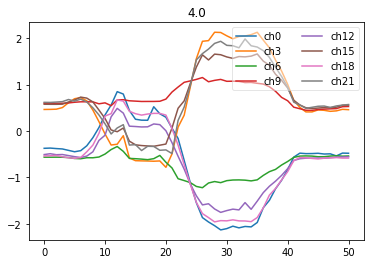

In [15]:
x1, y1 = data.x[idx],  data.y[idx]

show_timeseries(x1, title=y1, chs=range(0,24,3))

In [78]:
def get_ts_items(fnames):
    data = TSData()
    data.load(fnames)
    return data.get_items()

In [79]:
items_2 = get_ts_items([fname_train, fname_test])
items_2[1]

(array([[-0.54737 , -0.546334, -0.549748, ..., -0.533726, -0.528338,
         -0.518618],
        [-1.600105, -1.599419, -1.595734, ..., -1.576063, -1.572246,
         -1.565955],
        [-0.809446, -0.80942 , -0.812398, ..., -0.766209, -0.764902,
         -0.765835],
        ...,
        [ 0.618919,  0.648665,  0.618913, ...,  0.455396,  0.457002,
          0.456688],
        [-1.497652, -1.465919, -1.50323 , ..., -1.435609, -1.422537,
         -1.421817],
        [-0.754927, -0.706829, -0.758939, ..., -0.538306, -0.530174,
         -0.529384]], dtype=float32), '3.0')

## Transforms

### Data Transform

In [38]:
#export
class TensorTS(TensorBase):   
#     def __rep__(): return f"{self.__class__.__name__}\n {self.shape}"
    def show(self, ctx=None, title=None, chs=None, leg=True, **kwargs):
        if ctx is None: fig, ctx = plt.subplots()
        t = range(self.shape[1])
        chs_max = max(chs) if chs else 0
        channels = chs if (chs and (chs_max < self.shape[0])) else range(self.shape[0]) 
        for ch in channels:
            ctx.plot(t, self[ch], label='ch'+str(ch))
        if leg: ctx.legend(loc='upper right', ncol=2, framealpha=0.5)
        if title: ctx.set_title(title)

In [126]:
#export
class ToTensorTSBlock(Transform):
    def encodes(self, x): 
        return TensorTS(x)  

In [ ]:
#export
class ToTensorTS(Transform):
    def encodes(self, x): 
        return TensorTS(x[0])  

In [40]:
tfm_tts = ToTensorTS(as_item=True)

In [41]:
idx = 3
item = items[idx]
# item

In [43]:
# ts = TensorTS(item) 

In [44]:
t = tfm_tts(item)
t, type(t), t.shape

(TensorTS([[-0.5147, -0.5186, -0.5213,  ..., -0.6287, -0.6326, -0.6065],
         [-1.8940, -1.8950, -1.8920,  ..., -1.9529, -1.9495, -1.9313],
         [-0.7490, -0.7383, -0.7287,  ..., -0.6161, -0.6443, -0.6673],
         ...,
         [ 0.4397,  0.4380,  0.4334,  ...,  0.5668,  0.5064,  0.5925],
         [-1.7014, -1.7506, -1.6242,  ..., -1.6601, -1.9693, -1.6339],
         [-0.8094, -0.8248, -0.7892,  ..., -0.5281, -0.4773, -0.5100]]),
 __main__.TensorTS,
 torch.Size([24, 51]))

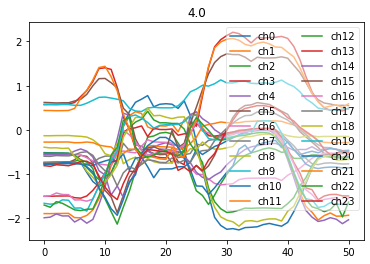

In [45]:
t.show(title = item[1]) #All X cordinates : Hand tip left X, Hand tip right X, Elbow left X, Elbow right X, etc.

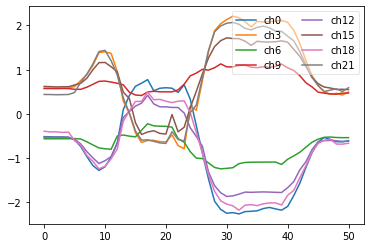

In [46]:
t.show(chs=range(0,24,3)) #All X cordinates : Hand tip left X, Hand tip right X, Elbow left X, Elbow right X, etc.

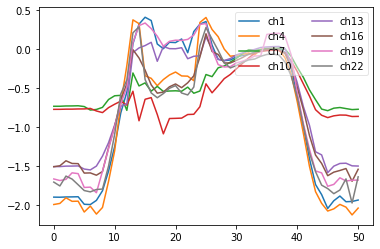

In [47]:
t.show(chs=range(1,24,3), leg=True) #All Y cordinates : Hand tip left Y, Hand tip right Y, Elbow left Y, Elbow right Y, etc.

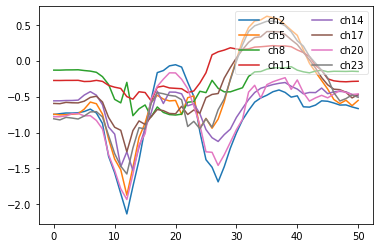

In [48]:
t.show(chs=range(2,24,3)) #All Z cordinates : Hand tip left Z, Hand tip right Z, Elbow left Z, Elbow right Z, etc.

### Label Transform

In [52]:
#export
class LabelTS(Transform):
    def encodes(self, x): 
        return x[1]

In [53]:
items[idx][1]

'4.0'

In [54]:
tfm_lts = LabelTS(as_item=True)
lbl = tfm_lts(items[idx])
lbl

'4.0'

## Eager Normalization
Eager normalization is applied to the all the items ahead of time. 
per_samples normalization cannot applied per batch because of the tensors sizes mismatch. 
per_samples normalization has a shape of (N, 1, 1) whereas the batch has a shape of (bs, C, L)

## Splits

## Datasets

## Dataloaders

## Normalize - Standardize

>TSData:
> Datasets names (concatenated): ['NATOPS_Train', 'NATOPS_Test']
 
> Filenames: [Path('data/UCR/NATOPS/NATOPS_Train.arff'), Path('data/UCR/NATOPS/NATOPS_Test.arff')]
 
> Data shape: (360, 24, 51)
 
> Targets shape: (360,)

> Nb Samples: 360

> Nb Channels: 24

> Sequence Length: 51

> ((360, 24, 51), (360,))

In [56]:
#export
def get_stats(train, scale_type='standardize', scale_subtype='all_samples'):
    if scale_type == 'normalize':
        if scale_subtype == 'all_samples':
            train_min = train.min(keepdims=True)
            train_max = train.max(keepdims=True)
        elif scale_subtype == 'per_sample':
            train_min = train.min(axis=(1, 2), keepdims=True)
            train_max = train.max(axis=(1, 2), keepdims=True)
        elif scale_subtype == 'per_channel':
            train_min = train.min(axis=(0, 2), keepdims=True)
            train_max = train.max(axis=(0, 2), keepdims=True)
        elif scale_subtype == 'per_sample_per_channel':
            train_min = train.min(axis=(2), keepdims=True)
            train_max = train.max(axis=(2), keepdims=True)
        else:
            print('***** Please, select a valid  scaling_subtype *****')
            return
        min, max = train_min, train_max
        return min, max

    elif scale_type == 'standardize':
        print(scale_type)
        if scale_subtype == 'all_samples':
            train_mean = train.mean(keepdims=True)
            train_std = train.std(keepdims=True)
        elif scale_subtype == 'per_sample':
            train_mean = train.mean(axis=(1, 2), keepdims=True)
            train_std = train.std(axis=(1, 2), keepdims=True)
        elif scale_subtype == 'per_channel':
            train_mean = train.mean(axis=(0, 2), keepdims=True)
            train_std = train.std(axis=(0, 2), keepdims=True)
        elif scale_subtype == 'per_sample_per_channel':
            train_mean = train.mean(axis=(2), keepdims=True)
            train_std = train.std(axis=(2), keepdims=True)
        else:
            print('***** Please, select a valid  scaling_subtype *****')
            return
        mean, std = torch.tensor(train_mean), torch.tensor(train_std)
        return mean, std 

    else:
        print('***** Please, select a valid  scaling_type *****')
        return

In [57]:
scale_type = 'standardize'         # ✳️ 'standardize', 'normalize'
scale_subtype = 'per_sample_per_channel'      # ✳️ 'all_samples', 'per_channel', 'per_sample'
scale_range = (0, 1)

In [58]:
data_stats = get_stats(data.x, scale_type=scale_type, scale_subtype=scale_subtype)
data_stats[0].shape, data_stats[1].shape

standardize


(torch.Size([360, 24, 1]), torch.Size([360, 24, 1]))

### Normalize Transform

In [59]:
# export
@docs
class Normalize(Transform):
    "Normalize/denorm batch of `TimeseriesTensor`"
    order=99
    def __init__(self, mean, std, cuda=True): 
        f = to_device if cuda else noop
        self.mean,self.std = f(mean), f(std)
        
    def encodes(self, x:TensorTS): 
        print('Normalize - encodes')
        return (x-self.mean) / self.std
    def decodes(self, x:TensorTS): 
        f = to_cpu if x.device.type=='cpu' else noop
        return (x*f(self.std) + f(self.mean))

    _docs=dict(encodes="Normalize batch", decodes="Denormalize batch")

In [60]:
# export
@docs
class SelfNormalize(Transform):
    "Normalize/denorm a `TimeseriesTensor` either per sample or per channel "
    order=99
    def __init__(self,  scale_type='standardize', scale_subtype='per_sample', scale_range=(-1, 1)): 
        self.scale_type = scale_type
        self.scale_subtype = scale_subtype
        self.scale_range = scale_range
        
        
    def encodes(self, x:TensorTS): 
#         print('normalize')
        if scale_type is None:
            return x
        
        if self.scale_type == 'normalize':
#             print('normalize')
            if self.scale_subtype == 'per_sample':
                self.min = (torch.min(x)).expand_as(x)
                self.max = (torch.max(x)).expand_as(x)
#                 print(self.min)
#                 print(self.max)
            elif self.scale_subtype == 'per_sample_per_channel':
#                 print('per_sample_per_channel')
                self.min = (torch.min(t, dim=1, keepdims=True).values).expand_as(x)
                self.max = (torch.max(t, dim=1, keepdims=True).values).expand_as(x)
#                 print(self.min)
#                 print(self.max)
            else: return x
            return ((x-self.min) / (self.max - self.min)) * (self.scale_range[1] - self.scale_range[0]) + self.scale_range[0]      
        elif self.scale_type == 'standardize':
#             print('standardize')
            if self.scale_subtype == 'per_sample':
                self.mean = x.mean(axis=(0,1), keepdims=True)
                self.std = x.std(axis=(0,1), keepdims=True)
            elif self.scale_subtype == 'per_sample_per_channel':
                print('per_sample_per_channel')
#                 self.mean = x.mean(axis=(1), keepdims=True)
                self.std = x.std(axis=(1), keepdims=True)
            else: return x
            return (x-self.mean) / self.std
        else: return x
#     def decodes(self, x:TensorTS): 
#         f = to_cpu if x.device.type=='cpu' else noop
#         return (x*f(self.std) + f(self.mean))

    _docs=dict(encodes="Normalize either per sample or per channel") #, decodes="Denormalize either per sample or per channel"

In [61]:
# item[0].min(axis=(1), keepdims=True), item[0].max(axis=(1), keepdims=True)
# item[0].mean(), item, item[0].shape

In [62]:
t = tfm_tts(item)
t, t.shape

(TensorTS([[-0.5147, -0.5186, -0.5213,  ..., -0.6287, -0.6326, -0.6065],
         [-1.8940, -1.8950, -1.8920,  ..., -1.9529, -1.9495, -1.9313],
         [-0.7490, -0.7383, -0.7287,  ..., -0.6161, -0.6443, -0.6673],
         ...,
         [ 0.4397,  0.4380,  0.4334,  ...,  0.5668,  0.5064,  0.5925],
         [-1.7014, -1.7506, -1.6242,  ..., -1.6601, -1.9693, -1.6339],
         [-0.8094, -0.8248, -0.7892,  ..., -0.5281, -0.4773, -0.5100]]),
 torch.Size([24, 51]))

In [63]:
t.max

<bound method _patch_tb.<locals>.get_f.<locals>._f of TensorTS([[-0.5147, -0.5186, -0.5213,  ..., -0.6287, -0.6326, -0.6065],
        [-1.8940, -1.8950, -1.8920,  ..., -1.9529, -1.9495, -1.9313],
        [-0.7490, -0.7383, -0.7287,  ..., -0.6161, -0.6443, -0.6673],
        ...,
        [ 0.4397,  0.4380,  0.4334,  ...,  0.5668,  0.5064,  0.5925],
        [-1.7014, -1.7506, -1.6242,  ..., -1.6601, -1.9693, -1.6339],
        [-0.8094, -0.8248, -0.7892,  ..., -0.5281, -0.4773, -0.5100]])>

In [64]:
min = (t.min(dim=1, keepdims=True).values).expand_as(t)
min.shape, min

(torch.Size([24, 51]),
 tensor([[-2.2635, -2.2635, -2.2635,  ..., -2.2635, -2.2635, -2.2635],
         [-2.0393, -2.0393, -2.0393,  ..., -2.0393, -2.0393, -2.0393],
         [-2.1327, -2.1327, -2.1327,  ..., -2.1327, -2.1327, -2.1327],
         ...,
         [-0.6685, -0.6685, -0.6685,  ..., -0.6685, -0.6685, -0.6685],
         [-1.9693, -1.9693, -1.9693,  ..., -1.9693, -1.9693, -1.9693],
         [-1.5770, -1.5770, -1.5770,  ..., -1.5770, -1.5770, -1.5770]]))

In [65]:
# min = torch.max(t)
# min

In [66]:
# m = min.expand_as(t)
# m

In [67]:
# m = torch.broadcast_tensors(min, t)
# m

In [68]:
t.shape

torch.Size([24, 51])

In [69]:
tfm_norm = SelfNormalize(scale_type='normalize', scale_subtype = 'per_sample', scale_range=(0, 1))
tfm_norm

SelfNormalize: True (TensorTS,object) -> encodes 

In [70]:
item_norm = tfm_norm(t)
item_norm.shape

torch.Size([24, 51])

In [71]:
tfm_norm.min

tensor([[-2.2635, -2.2635, -2.2635,  ..., -2.2635, -2.2635, -2.2635],
        [-2.2635, -2.2635, -2.2635,  ..., -2.2635, -2.2635, -2.2635],
        [-2.2635, -2.2635, -2.2635,  ..., -2.2635, -2.2635, -2.2635],
        ...,
        [-2.2635, -2.2635, -2.2635,  ..., -2.2635, -2.2635, -2.2635],
        [-2.2635, -2.2635, -2.2635,  ..., -2.2635, -2.2635, -2.2635],
        [-2.2635, -2.2635, -2.2635,  ..., -2.2635, -2.2635, -2.2635]])

In [72]:
item_norm, item_norm.shape

(TensorTS([[0.3910, 0.3901, 0.3895,  ..., 0.3655, 0.3646, 0.3704],
         [0.0826, 0.0824, 0.0831,  ..., 0.0694, 0.0702, 0.0743],
         [0.3386, 0.3410, 0.3431,  ..., 0.3683, 0.3620, 0.3569],
         ...,
         [0.6044, 0.6040, 0.6030,  ..., 0.6328, 0.6193, 0.6385],
         [0.1257, 0.1147, 0.1429,  ..., 0.1349, 0.0658, 0.1408],
         [0.3251, 0.3217, 0.3296,  ..., 0.3880, 0.3993, 0.3920]]),
 torch.Size([24, 51]))

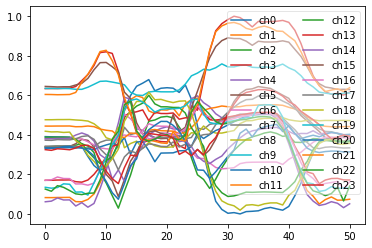

In [73]:
item_norm.show()

In [ ]:
seed = 42
splits = RandomSplitter(seed=seed)(range_of(items))
splits
# len(split_idx[0]), len(split_idx[1])

In [74]:
# Eager Normalization was done at DataSource creation
tfm_norm = SelfNormalize(scale_type='normalize', scale_subtype = 'per_sample', scale_range=(0, 1))

tfms = [[ToTensorTS(as_item=True)], [LabelTS(as_item=True), Categorize()]]
# Create a dataset
dsrc = Datasets(items, tfms, splits=splits)

3.0


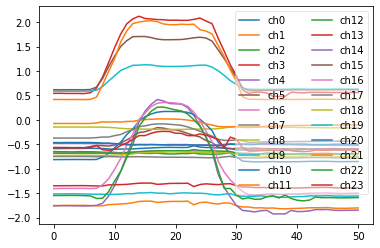

In [75]:
ax = show_at(dsrc, 2, figsize=(1,1))

### Create a dataloader

In [77]:
bs = 128                            
# Normalize at batch time
batch_tfms = [tfm_norm]
dbch = dsrc.dataloaders( bs=bs, val_bs=bs * 2, after_batch=batch_tfms, num_workers=0, device=default_device()) 

#dbch = dsrc.dataloaders( bs=bs, val_bs=bs * 2, num_workers=0, device=default_device())

# Using Datablock

In [124]:
def TSBlock():
    "`TransformBlock` for timeseries : Transform np array to TensorTS type"
    return TransformBlock(type_tfms=ToTensorTSBlock())

In [127]:
# source = data.get_items()
tsdb = DataBlock(blocks=(TSBlock, CategoryBlock),
                   get_items=get_ts_items,
                   get_x=lambda x:x[0],
                   splitter=RandomSplitter(seed=seed),
                   get_y=lambda x:x[1],
                   batch_tfms = batch_tfms)

In [128]:
tsdb.summary([fname_train, fname_test])

Setting-up type transforms pipelines
Found 360 items
2 datasets of sizes 288,72
Setting up Pipeline: <lambda> -> ToTensorTSBlock
Setting up Pipeline: <lambda> -> Categorize

Building one sample
  Pipeline: <lambda> -> ToTensorTSBlock
    starting from
      ([[-0.593007 -0.590538 -0.59537  ... -0.587066 -0.575835 -0.564391]
 [-1.998303 -1.995936 -1.995135 ... -1.97879  -1.966064 -1.959807]
 [-0.720527 -0.72558  -0.722334 ... -0.717818 -0.715772 -0.716293]
 ...
 [ 0.5735    0.572567  0.573968 ...  0.488432  0.484588  0.50321 ]
 [-1.693751 -1.688061 -1.708917 ... -1.530954 -1.622639 -1.554407]
 [-0.577875 -0.578488 -0.577335 ... -0.760029 -0.780768 -0.753245]], 3.0)
    applying <lambda> gives
      [[-0.593007 -0.590538 -0.59537  ... -0.587066 -0.575835 -0.564391]
 [-1.998303 -1.995936 -1.995135 ... -1.97879  -1.966064 -1.959807]
 [-0.720527 -0.72558  -0.722334 ... -0.717818 -0.715772 -0.716293]
 ...
 [ 0.5735    0.572567  0.573968 ...  0.488432  0.484588  0.50321 ]
 [-1.693751 -1.68806

In [171]:
dls = tsdb.dataloaders([fname_train, fname_test], num_workers=0, device=default_device())

In [145]:
# source = data.get_items()
tsdb_2 = DataBlock(blocks=(TSBlock, CategoryBlock),
                   get_x=lambda x:x[0],
                   splitter=RandomSplitter(seed=seed),
                   get_y=lambda x:x[1])

In [146]:

#tsdb.summary(data.get_items())
# tsdb.datasets.subset(0)

In [148]:
dls_2 = tsdb_2.dataloaders(data.get_items(), batch_tfms=batch_tfms, num_workers=0, device=default_device())
# dls.show_batch(max_n=9, figsize=(4,4)) 

## Plot batch

In [130]:
#export
def default_show_batch(x, y, its, ctxs=None, max_n=9, **kwargs):
    if ctxs is None: ctxs = Inf.nones
    ctxs = [b[0].show(ctx=c, title=b[1], **kwargs) for b,c,_ in zip(its,ctxs,range(max_n))]
    plt.tight_layout()
    return ctxs

In [132]:
def get_grid(n, rows=None, cols=None, add_vert=0, figsize=None, double=False, title=None, return_fig=False):
    rows = rows or int(np.ceil(math.sqrt(n)))
    cols = cols or int(np.ceil(n/rows))
    if double: cols*=2 ; n*=2
    figsize = (cols*3, rows*3+add_vert) if figsize is None else figsize
    fig,axs = subplots(rows, cols, figsize=figsize)
    axs = [ax if i<n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    if title is not None: fig.suptitle(title, weight='bold', size=14)
    return (fig,axs) if return_fig else axs

In [138]:
#export
@typedispatch
def show_batch(x:TensorTS, y, its, ctxs=None, max_n=9, rows=None, cols=None, figsize=None, title=None, **kwargs):
    if ctxs is None: ctxs = get_grid(max_n, rows=rows, cols=cols, figsize=figsize)
    # if ctxs is None: ctxs = Inf.nones
    
    # Original
    ctxs = default_show_batch(x, y, its, ctxs=ctxs, max_n=max_n, **kwargs)
    # ctxs = show_batch[object](x, y, its, ctxs=ctxs, max_n=max_n, **kwargs)
    if title:
        plt.suptitle(title, fontsize=16)
        plt.subplots_adjust()
        plt.subplots_adjust(left=0.0, wspace=0.4, top=0.9, bottom=0.5)
    return ctxs

In [217]:
@typedispatch
#def show_results(x:TensorImage, y, samples, outs, ctxs=None, max_n=9, rows=None, cols=None, figsize=None, **kwargs):
def show_results(x:TensorTS, y, its,  outs, ctxs=None, max_n=9, rows=None, cols=None, figsize=None, **kwargs):
    # if ctxs is None: ctxs = get_grid(min(len(its), max_n), rows=rows, cols=cols, add_vert=1, figsize=figsize)
    s = len(its)  # min(len(samples), max_n)
    # max_n = min(s, max_n)
    if ctxs is None: ctxs = get_grid(max_n, rows=rows, cols=cols, add_vert=1, figsize=figsize)
    print(len(its), max_n)
    print(its)
    print(type(y))
    ctxs = [b[0].show(ctx=c, title=f'{o} / {b[1]}', **kwargs) for b,o,c,_ in zip(its,outs,ctxs,range(max_n))]
    # if title:
    #     plt.suptitle(title, fontsize=16)
    #     plt.subplots_adjust(left=0.0, wspace=0.4, top=0.9)   
    plt.tight_layout()
    return ctxs


2 2
(#2) [(TensorTS([[0.3944, 0.3943, 0.3925,  ..., 0.3972, 0.3963, 0.3947],
        [0.1485, 0.1506, 0.1500,  ..., 0.1559, 0.1546, 0.1566],
        [0.3606, 0.3593, 0.3593,  ..., 0.3685, 0.3694, 0.3671],
        ...,
        [0.5593, 0.5594, 0.5594,  ..., 0.5758, 0.5673, 0.5644],
        [0.1936, 0.1939, 0.1952,  ..., 0.2101, 0.2028, 0.2143],
        [0.3630, 0.3630, 0.3637,  ..., 0.3881, 0.3735, 0.3764]]), '2.0'),(TensorTS([[0.3836, 0.3836, 0.3838,  ..., 0.3802, 0.3813, 0.3814],
        [0.1943, 0.1944, 0.1948,  ..., 0.1977, 0.1960, 0.1970],
        [0.3912, 0.3908, 0.3899,  ..., 0.3931, 0.3945, 0.3947],
        ...,
        [0.5846, 0.5845, 0.5848,  ..., 0.5749, 0.5755, 0.5776],
        [0.2196, 0.2201, 0.2178,  ..., 0.2346, 0.2335, 0.2305],
        [0.4103, 0.4102, 0.4093,  ..., 0.4055, 0.4059, 0.4106]]), '1.0')]
<class 'fastai2.torch_core.TensorCategory'>


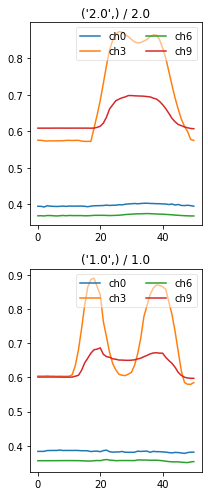

In [218]:
learn.show_results(max_n=2, chs=range(0,12,3))

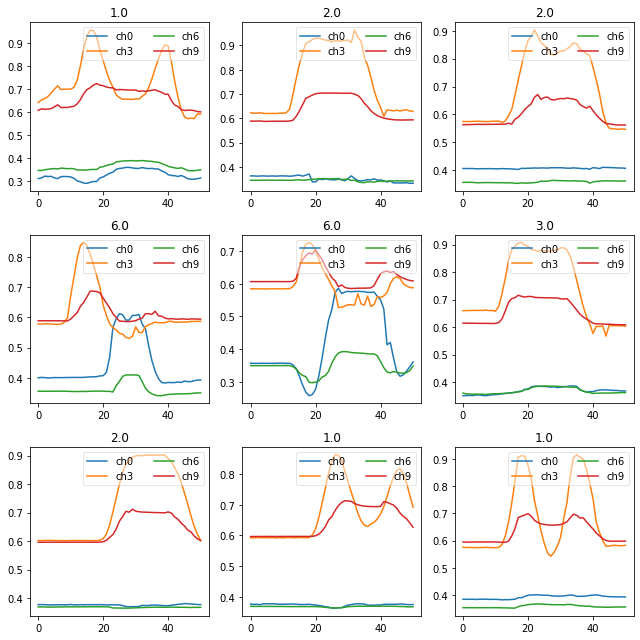

In [173]:
dls.show_batch(ctxs=None, max_n=9, chs=range(0,12,3))

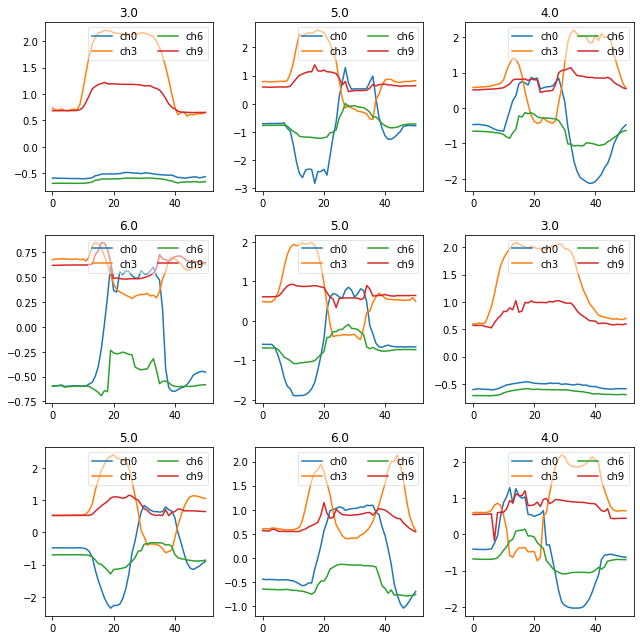

In [150]:
dls_2.show_batch(ctxs=None, max_n=9, chs=range(0,12,3))

In [ ]:
# dls.show_batch(ctxs=None, max_n=9, chs=range(0,12,3), title='Batch')

In [131]:
source = data.get_items()
x,y = source[0]
print(x.shape, x) 
print(y.shape, y)

(24, 51) [[-0.372758 -0.367844 -0.378445 ... -0.537007 -0.475939 -0.479505]
 [-1.821679 -1.841987 -1.821358 ... -1.751323 -1.772353 -1.761632]
 [-0.846321 -0.846325 -0.839571 ... -0.60374  -0.763048 -0.793202]
 ...
 [ 0.619205  0.617045  0.624789 ...  0.541325  0.559272  0.571569]
 [-1.771773 -1.79666  -1.738568 ... -1.691657 -1.683121 -1.721661]
 [-0.810086 -0.818863 -0.78806  ... -0.716364 -0.757526 -0.741532]]
() 4.0


In [132]:
# db = DataBlock(types=(TensorTS, Category),
#                 get_items=lambda x: x,
#                 splitter=RandomSplitter(seed=seed),
#                 item_tfms=[[ToTensorTS(as_item=True)], [LabelTS(as_item=True), Categorize()]],
#                 batch_tfms=tfm_norm)

In [133]:
# dls = db.dataloaders(source)

In [135]:
# b = dbunch.one_batch()

# print(type(b))
# print(b[0].shape, type(b[0]), len(b[0])) 
# print(b[1].shape, type(b[1]), len(b[1]), b[1])

In [136]:
b = dbch.one_batch()

print(type(b))
print(b[0].shape, type(b[0]), len(b[0])) 
print(b[1].shape, type(b[1]), len(b[1]), b[1])

<class 'tuple'>
torch.Size([128, 24, 51]) <class '__main__.TensorTS'> 128
torch.Size([128]) <class 'fastai2.torch_core.TensorCategory'> 128 TensorCategory([0, 1, 0, 5, 1, 4, 0, 3, 1, 2, 5, 3, 3, 0, 4, 1, 5, 1, 0, 4, 5, 3, 5, 2,
        3, 1, 4, 4, 2, 2, 5, 2, 2, 1, 3, 0, 3, 3, 3, 1, 3, 5, 2, 4, 3, 2, 3, 4,
        0, 5, 2, 2, 5, 5, 2, 0, 1, 2, 0, 2, 5, 0, 5, 2, 1, 5, 2, 1, 2, 2, 0, 2,
        0, 5, 0, 5, 1, 5, 3, 4, 4, 4, 5, 0, 0, 5, 2, 0, 3, 4, 0, 0, 0, 1, 3, 1,
        5, 4, 0, 2, 3, 4, 1, 3, 5, 1, 1, 1, 1, 2, 2, 1, 2, 3, 0, 1, 2, 2, 5, 5,
        5, 5, 0, 4, 0, 4, 4, 1], dtype=torch.int32)


In [137]:
b[0].max(), b[0].min()

(TensorTS(1.), TensorTS(0.))

In [138]:
# dbch.show_batch(max_n=9, chs=range(0,12,3), title='Batch') # max_n=2

In [151]:
x = dls.train.one_batch()
# len(x), type(x)

dbch.train_ds[0]

(TensorTS([[-0.5406, -0.5410, -0.5406,  ..., -0.5630, -0.5663, -0.5537],
         [-1.5396, -1.5400, -1.5390,  ..., -1.5320, -1.5346, -1.5360],
         [-0.6085, -0.6046, -0.6077,  ..., -0.5938, -0.5929, -0.5990],
         ...,
         [ 0.4545,  0.4499,  0.4532,  ...,  0.4803,  0.4554,  0.4573],
         [-1.4114, -1.3635, -1.3909,  ..., -1.4681, -1.3687, -1.3866],
         [-0.4734, -0.4533, -0.4638,  ..., -0.4406, -0.4272, -0.4356]]),
 TensorCategory(1, dtype=torch.int32))

In [153]:
# get_c(dbch)
getattr(dls, 'c', False)
vocab = getattr(dbch, 'vocab', [])
vocab[-1]
is_listy(vocab[-1])
vocab

(#6) ['1.0','2.0','3.0','4.0','5.0','6.0']

## Train Model

In [154]:
bs

128

## Build learner

In [155]:
# Number of channels (i.e. dimensions in ARFF and TS files jargon)
c_in = data.n_channels
# Number of classes
c_out= len(dbch.vocab) 
c_in,c_out

(24, 6)

In [156]:
# import gc

# print('Deleting learn object')
# del learn
# gc.collect()

In [157]:
# learn.purge()
opt_func = partial(Adam, lr=3e-3, wd=0.01)     
loss_func = LabelSmoothingCrossEntropy()      

In [158]:
model = create_inception(c_in, c_out).to(device=default_device())
model

Sequential(
  (0): SequentialEx(
    (layers): ModuleList(
      (0): InceptionModule(
        (convs): ModuleList(
          (0): Conv1d(24, 32, kernel_size=(39,), stride=(1,), padding=(19,), bias=False)
          (1): Conv1d(24, 32, kernel_size=(19,), stride=(1,), padding=(9,), bias=False)
          (2): Conv1d(24, 32, kernel_size=(9,), stride=(1,), padding=(4,), bias=False)
        )
        (maxpool_bottleneck): Sequential(
          (0): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
          (1): Conv1d(24, 32, kernel_size=(1,), stride=(1,), bias=False)
        )
        (bn_relu): Sequential(
          (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU()
        )
      )
    )
  )
  (1): SequentialEx(
    (layers): ModuleList(
      (0): InceptionModule(
        (bottleneck): Conv1d(128, 32, kernel_size=(1,), stride=(1,))
        (convs): ModuleList(
          (0): Conv1d(32, 32, kernel_size=(39

In [165]:
#Learner
learn = Learner(dbch, model, opt_func=opt_func, loss_func=loss_func, metrics=accuracy)
# learn = Learner(dls, model, opt_func=opt_func, loss_func=loss_func, metrics=accuracy)

# mixup = MixUp(0.4)
# learn = Learner(dbch, model, opt_func=opt_func, loss_func=loss_func, metrics=accuracy, cbs=mixup)
# learn = Learner(dbch, model, opt_func=opt_func, loss_func=loss_func, metrics=accuracy, cbs= ShowGraphCallback())
print(learn.model)

Sequential(
  (0): SequentialEx(
    (layers): ModuleList(
      (0): InceptionModule(
        (convs): ModuleList(
          (0): Conv1d(24, 32, kernel_size=(39,), stride=(1,), padding=(19,), bias=False)
          (1): Conv1d(24, 32, kernel_size=(19,), stride=(1,), padding=(9,), bias=False)
          (2): Conv1d(24, 32, kernel_size=(9,), stride=(1,), padding=(4,), bias=False)
        )
        (maxpool_bottleneck): Sequential(
          (0): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
          (1): Conv1d(24, 32, kernel_size=(1,), stride=(1,), bias=False)
        )
        (bn_relu): Sequential(
          (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): ReLU()
        )
      )
    )
  )
  (1): SequentialEx(
    (layers): ModuleList(
      (0): InceptionModule(
        (bottleneck): Conv1d(128, 32, kernel_size=(1,), stride=(1,))
        (convs): ModuleList(
          (0): Conv1d(32, 32, kernel_size=(39

In [166]:
 print(learn.summary())

Sequential (Input shape: ['128 x 24 x 51'])
Layer (type)         Output Shape         Param #    Trainable 
Conv1d               128 x 32 x 51        29,952     True      
________________________________________________________________
Conv1d               128 x 32 x 51        14,592     True      
________________________________________________________________
Conv1d               128 x 32 x 51        6,912      True      
________________________________________________________________
MaxPool1d            128 x 24 x 51        0          False     
________________________________________________________________
Conv1d               128 x 32 x 51        768        True      
________________________________________________________________
BatchNorm1d          128 x 128 x 51       256        True      
________________________________________________________________
ReLU                 128 x 128 x 51       0          False     
______________________________________________________

In [161]:
# xb,infos = layer_info(learn)
# infos

In [162]:
# learn.dbunch.dls[1] = learn.dbunch.dls[0]
# learn.dbunch.dls[1].dataset = learn.dbunch.dls[0].dataset

# print(bs, len(learn.dbunch.train_dl)*bs, len(learn.dbunch.valid_dl)*bs)
# print(len(learn.dbunch.train_ds), len(learn.dbunch.valid_ds))

In [163]:
# type(dbch.da) #, len(dbch.train.x), len(db.valid.y)

### LR find 

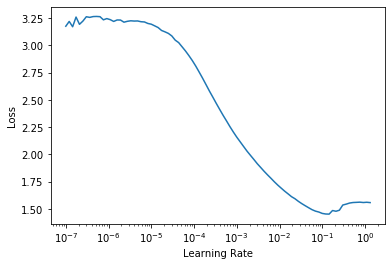

In [174]:
learn = Learner(dls, model, opt_func=opt_func, loss_func=loss_func, metrics=accuracy)
learn.lr_find()

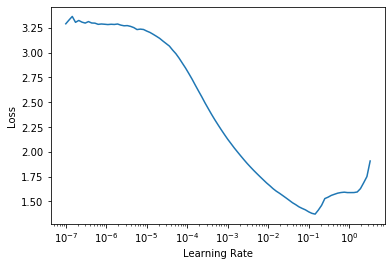

In [167]:
# learn.load('stage_0')
learn.lr_find()
# In v2 do not call learn.recorder.plot() because it is called by learn.lr_find()
# learn.recorder.plot()

### Train

In [175]:
epochs = 20      
lr_max = 1e-3      
pct_start = .7   
moms=(0.95,0.85,0.95)   
wd = 1e-2

In [176]:
# learn.metrics = metrics
# learn.load('stage_0')
learn.fit_one_cycle(epochs, lr_max=lr_max, pct_start=pct_start,  moms=moms, wd=wd)
learn.save('stage_1')

epoch,train_loss,valid_loss,accuracy,time
0,2.950735,1.801362,0.138889,00:03
1,2.533573,1.808996,0.152778,00:03
2,2.143855,1.819147,0.152778,00:03
3,1.814312,1.832620,0.152778,00:03
4,1.569317,1.842135,0.152778,00:03
5,1.391387,1.850281,0.152778,00:03
6,1.260187,1.877250,0.152778,00:03
7,1.159086,1.865903,0.152778,00:03
8,1.077516,1.729238,0.208333,00:03
9,1.012070,1.395104,0.500000,00:03


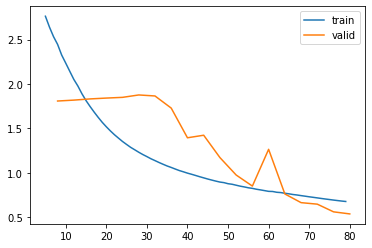

In [177]:
learn.recorder.plot_loss()

## Show results

In [181]:
learn.show_results(max_n=9, chs=range(0,12,3))

TypeError: show_results() got multiple values for argument 'ctxs'

## Export -

In [92]:
#hide
from nbdev.export import notebook2script
notebook2script()
# notebook2script(fname='80_timeseries_core.ipynb')

Converted 00_core.ipynb.
Converted 80_timeseries_core.ipynb.
Converted 80_timeseries_data.ipynb.
Converted index.ipynb.
